In this notebook we show basic interactive use of Gobnilp with discrete data.

The first thing we do is to import the Gobnilp class from the gobnilp Python module and create a Gobnilp object which here we choose to call `m`. Practically all interactive sessions start with these two steps.

In [1]:
%matplotlib notebook 
from gobnilp import Gobnilp
m = Gobnilp()

Using license file /home/userfs/j/jc33/gurobi.lic
Academic license - for non-commercial use only


Note that Gurobi (not Gobnilp) here prints out the type of Gurobi licence installed.
Next we use the method `learn` which, with default parameters, reads in discrete data and learns a Bayesian network from it.
We're using default parameters so BDeu scoring (with an *effective sample size* of 1) will be used. The dataset we use is `discrete.dat` which comes with Gobnilp. This dataset is called 'learning.test' in the bnlearn R package.

**********
BN has score -24028.09477835351
**********
A<- -5502.137377150637
B<-A -3688.9395212202216
C<- -3501.5105385969146
D<-A,C -3555.0144442365527
E<-B,F -4310.3049564706525
F<- -3470.18794067853
**********
bnlearn modelstring = 
[A][B|A][C][D|C:A][E|B:F][F]
**********
CPDAG:
Vertices: A,B,C,D,E,F
A-B
A->D
B->E
C->D
F->E



<IPython.core.display.Javascript object>


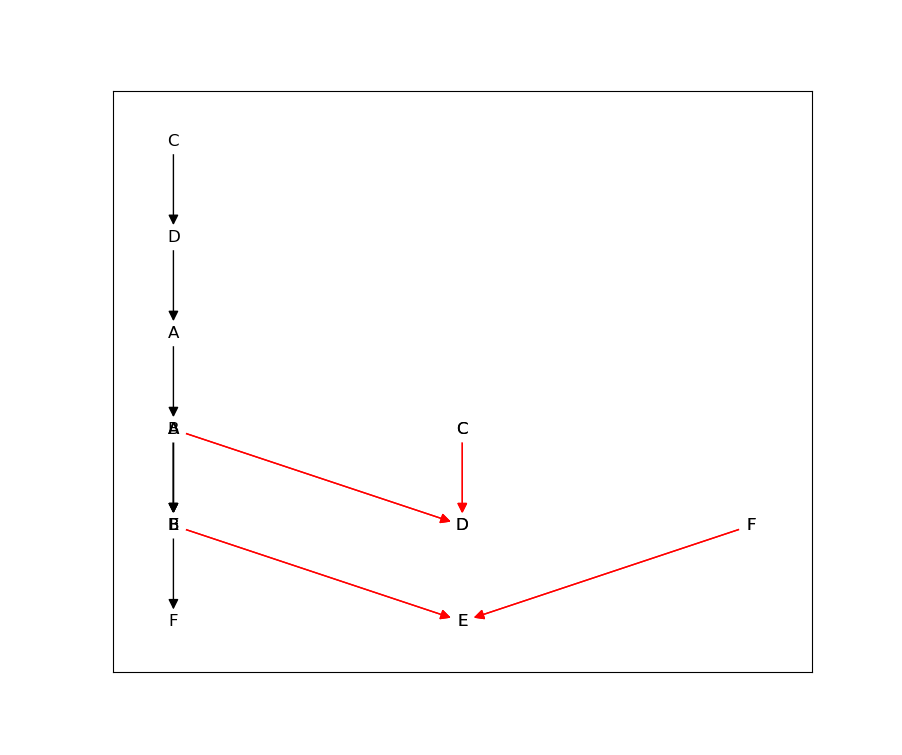

In [2]:
m.learn('discrete.dat')

It is worth going through the output step by step.
1. First we get the 'score' (in this case the BDeu score) of the learned Bayesian network. Since this was learned using default parameters this network has the best possible score of all networks **with the default limit on the number of parents a node can have** which is 3.
2. Next we get a textual representation of the learned BN. In each line we get the parents of a node together with the *local score* for this child-parents combination. The score of the network is just the sum of these local scores.
3. After this we get another textual representation of the network. This is the representation used by [bnlearn](http://bnlearn.com)
4. Then we get a textual representation of the *completed partially directed acyclic graph (CPDAG)* for the learned BN. This represents the Markov equivalence class of all BNs having the same conditional independence relations as the learned BN.
5. Finally we get a visual representation of the learned BN. In this Jupyter notebook the graph automatically gets embedded in the notebook. When running Gobnilp as a script or from a normal Python interpreter the network will appear in a window. Red arrows have the displayed orientation in every BN in the learned BN's Markov equivalence class. Black arrows are 'reversible'. In this case if we were to reverse the arrow from A to B then we would not create a cycle nor would we create or destroy any 'immoralities' (pairs of unmarried parents). So this arrow can be reversed to render a Markov equivalent BN.

This is all very well but perhaps we could find a higher scoring network is we did not have a parent set size limit of 3. So let's run again without this restriction and see what we get. The easiest option is just to create a new object (with the same name) and set the `palim` argument to None. (When using `palim` as an optional argument when running Gobnilp as a script it is necessary to set it to a number so that it is parsed correctly. But here `None` is OK and more intutitive. Setting it to, say, 99 would have the same effect.) 

In [3]:
m = Gobnilp()
m.learn('discrete.dat',palim=None)

**********
BN has score -24028.09477835351
**********
A<- -5502.137377150637
B<-A -3688.9395212202216
C<- -3501.5105385969146
D<-A,C -3555.0144442365527
E<-B,F -4310.3049564706525
F<- -3470.18794067853
**********
bnlearn modelstring = 
[A][B|A][C][D|C:A][E|B:F][F]
**********
CPDAG:
Vertices: A,B,C,D,E,F
A-B
A->D
B->E
C->D
F->E



OK, so this **is** really the optimal BN! Just to check that the parent set size limit is working, let's do this again but set the limit to 1.

In [4]:
m = Gobnilp()
m.learn('discrete.dat',palim=1)

**********
BN has score -24933.777022652117
**********
A<-D -4376.280191070102
D<-C -5485.591606147809
B<-A -3688.9395212202216
C<- -3501.5105385969146
E<-B -4854.487880793349
F<-E -3026.9672848237205
**********
bnlearn modelstring = 
[A|D][D|C][B|A][C][E|B][F|E]
**********
CPDAG:
Vertices: A,D,B,C,E,F
A-B
D-A
B-E
C-D
E-F



OK, we get a lower scoring network. This one happens to be a chain with all arrows reversible.